<a href="https://colab.research.google.com/github/Ahmed-Shatla/YaleB_Full_V2_CNN/blob/main/Yale_V2_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = '/content/drive/MyDrive/Faces data/CroppedYale'

In [3]:
images = []
label = []
for f in os.listdir(path):
  for image in os.listdir(path+'/'+f):
    if '.pgm' in image:
      img = cv2.imread(path+'/'+f+'/'+image,1)
      images.append(img)
      label.append(f)

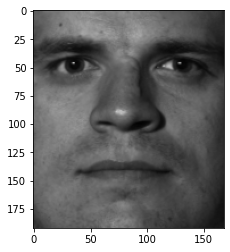

In [4]:
plt.imshow(cv2.cvtColor(images[0],cv2.COLOR_BGR2RGB))

In [5]:
images[0].shape

(192, 168, 3)

In [6]:
images = np.array(images)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [7]:
images[0].shape

(192, 168, 3)

In [8]:
h = []
w = []
for image in images:
  h.append(image.shape[0])
  w.append(image.shape[1])
print('avg shape : '+str(int(np.mean(h)))+","+str(int(np.mean(w))))

avg shape : 195,173


In [9]:
def reshape_images(images):
  reshaped_img = []
  for image in images:
    reshaped_img.append(cv2.resize(image,(170,190)))
  return reshaped_img
images = reshape_images(images)

In [10]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
labels = lb.fit_transform(label)

In [11]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(labels)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images,y,test_size=0.15)

X_train = np.array(X_train)
X_test = np.array(X_test)



In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
trainGenerator = ImageDataGenerator(zoom_range=-0.1,rotation_range=10,horizontal_flip=True,)
testGenerator = ImageDataGenerator()


In [15]:
train = trainGenerator.flow(X_train,y_train,batch_size=8)
test = testGenerator.flow(X_test,y_test,batch_size=8)

In [16]:
from tensorflow.keras.applications import VGG16
vgg_model = VGG16(include_top=False,input_shape=(190,170,3),weights='imagenet')
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 190, 170, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 190, 170, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 190, 170, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 95, 85, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 95, 85, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 95, 85, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 47, 42, 128)       0     

In [17]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Model

for layer in vgg_model.layers:
  layer.trainable = False

In [18]:
my_model = vgg_model.output

my_model = Flatten()(my_model)

my_model = Dense(128,activation='relu')(my_model)
my_model = Dense(64,activation='relu')(my_model)
my_model = Dense(128,activation='relu')(my_model)

my_model = Dense(38,activation='softmax')(my_model)



In [19]:
model = Model(vgg_model.input,my_model)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 190, 170, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 190, 170, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 190, 170, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 95, 85, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 95, 85, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 95, 85, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 47, 42, 128)       0     

In [21]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [22]:
history = model.fit_generator(train,validation_data=test,steps_per_epoch=16,epochs=5,verbose=1)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


16/16 [==============================] - 159s 10s/step - loss: 6.5897 - accuracy: 0.0312 - val_loss: 5.8752 - val_accuracy: 0.0647
Epoch 2/5
16/16 [==============================] - ETA: 0s - loss: 4.7019 - accuracy: 0.0703

KeyboardInterrupt: ignored